In [ ]:
'''
ALERT ATL FINACCESS GLOBAL, FI has no data!!!
ALERT BANKINTER EMPRESAS, FI has no data!!!
ALERT BANKINTER ETHOS, FI has no data!!!
ALERT BBVA COBERTURA ACTIVA DINAMICO, FI has no data!!!
ALERT BBVA COBERTURA ACTIVA EQUILIBRADO, FI has no data!!!
ALERT BBVA COBERTURA ACTIVA PRUDENTE, FI has no data!!!
ALERT BINDEX IXESG GLOBAL LEADERS INDICE, FI has no data!!!
ALERT BISSAN, FI has no data!!!
ALERT CAIXABANK BONOS SUBORDINADOS 2, FI has no data!!!
ALERT CUASAR OPTIMAL YIELD, FI has no data!!!
ALERT FONDONORTE GLOBAL DIVIDENDO, FI has no data!!!
ALERT FUNDCAMI FONDO SOLIDARIO, FI has no data!!!
ALERT GESTION BOUTIQUE IV, FI has no data!!!
ALERT GVC GAESCO ASIAN FIXED INCOME, FI has no data!!!
ALERT GVC GAESCO BLUE CHIPS RFMI, FI has no data!!!
ALERT IBERCAJA DIVERSIFICACIÓN EMPRESAS, FI has no data!!!
ALERT IBERCAJA RENTA FIJA EMPRESAS, FI has no data!!!
ALERT IBERCAJA RENTA FIJA SOSTENIBLE, FI has no data!!!
ALERT MUTUAFONDO MIXTO INTERNACIONAL, FI has no data!!!
ALERT PARADOX EQUITY FUND, FI has no data!!!
ALERT PSN MULTIESTRATEGIA, FI has no data!!!
ALERT SANTALUCIA GRANDES COMPAÑIAS ZONA EURO, FI has no data!!!
ALERT SANTALUCIA RENTA VARIABLE EEUU CUBIERTO, FI has no data!!!
ALERT UNIFOND MEGATENDENCIAS, FI has no data!!!
ALERT UNIFOND RENTABILIDAD OBJETIVO, FI has no data!!!
ALERT WELZIA CAPITAL SUB-DEBT, FI has no data!!!
'''

In [14]:
import requests
import json
import csv
from bs4 import BeautifulSoup
import os

infile = open("../data/DOC (9).XML","r")
contents = infile.read()
soup = BeautifulSoup(contents, 'lxml')

# bla=requests.get('https://www.cnmv.es/portal/Consultas/wuc/DescargaXBRLIPP.ashx?t={2a2d5290-274d-43f0-93db-dbef7a5a184d}')
# soup = BeautifulSoup(bla.content, 'lxml')

context_ref=soup.find(['xbrli:context',"context"])['id']
print(context_ref)
print('')

FIM_T12012_G-79501672_da



In [78]:
rotacion = soup.find('iic-com:indicerotacioncartera', {'contextref': context_ref})
print(rotacion.text)

0.40


In [77]:
clases = soup.find_all('iic-com:denominacionclase')
clases

[]

In [5]:
import pandas as pd
import numpy as np

a=pd.read_csv('data/dict_links.csv',index_col=0)
dict_links=a.to_dict(orient='dict')
dict_links=dict_links['links']

In [1]:
import os
import numpy as np
import pandas as pd

def create_df():
    df=False
    i=0
    for file in os.listdir('../data/csv'):
#         print(file, 'parsed')
        if type(df)==bool:
            df=pd.read_csv(f'../data/csv/{file}', sep='*')
        else:
            df=df.append(pd.read_csv(f'../data/csv/{file}', sep='*'))
        i+=1
    print(f'{i} files parsed!')
    return df
df=create_df()    

383 files parsed!


In [2]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17036 entries, 0 to 11
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fondo                17036 non-null  object 
 1   name                 17036 non-null  object 
 2   nif                  17036 non-null  int64  
 3   period               17036 non-null  object 
 4   start_date           17036 non-null  object 
 5   end_date             17036 non-null  object 
 6   registro_CNMV        17036 non-null  int64  
 7   email_gest           17022 non-null  object 
 8   rating_depos         16938 non-null  object 
 9   riesgo               17036 non-null  object 
 10  rotacion             16993 non-null  float64
 11  rentab_avg           16906 non-null  float64
 12  remun_liq            92 non-null     float64
 13  n_participaciones    17002 non-null  object 
 14  n_participes         17002 non-null  object 
 15  beneficio            17002 non-null  ob

#Estrategia:
- rating_depos y  email_gest: imputer "N/A" o n/d
- riesgo???  ver con value_counts pensar en agrupar en bajo/medio/alto?
- comisiones: imputer =0 una vez que tenga todos bien scrapeados
- rentab IIC, volat, ratio.... imputer valor?


In [3]:
df[df['ratio_gastos_trim'].isnull()].fondo.value_counts()

BOREAS CARTERA CRECIMIENTO, FI                    4
ADRIZA GLOBAL, FI                                 3
BANKIA RENTA FIJA LARGO PLAZO, FI                 2
BANKIA SOY ASÍ DINAMICO, FI                       2
BANKIA EVOLUCION SOSTENIBLE 30, FI                2
BNP PARIBAS PORTFOLIO MAX 65, FI                  2
BANKIA GLOBAL FLEXIBLE, FI                        2
BNP PARIBAS PORTFOLIO MAX 30, FI                  2
ATL CAPITAL CARTERA TACTICA, FI                   2
BANKIA MIXTO RENTA FIJA 15, FI                    2
BANKIA SOY ASI FLEXIBLE, FI                       2
BNP PARIBAS PORTFOLIO MAX 25, FI                  1
AFI GLOBAL FI                                     1
CAJA INGENIEROS BOLSA EURO PLUS, FI               1
BANKIA DOLAR, FI                                  1
BEST MANAGER SELECTION,  FI                       1
BANKIA INDEX JAPON, FI                            1
ABANCA RENTA VARIABLE EUROPA, FI                  1
BANKIA DIVIDENDO ESPAÑA , FI                      1
BESTINVER BO

In [18]:
f1=df['fondo']=='BOREAS CARTERA CRECIMIENTO, FI'
f2=df['ratio_gastos_trim'].isnull()
f3=df['period']=='Semester 1 2007'

#ejemplo filtro palabra:
    #f4=df['keyword'].apply(lambda x: 'key' in x or 'key2' in x)

df[f1]

In [5]:
#New columns
def period_type(x):
    if 'Semester' in x:
        return 'Semester'
    elif 'Trimester' in x:
        return 'Trimester'
    
def trimester_4(s2,t3):
    return 2*s2 - t3

def trimester_2(s1,t1):
    return 2*s1 - t1

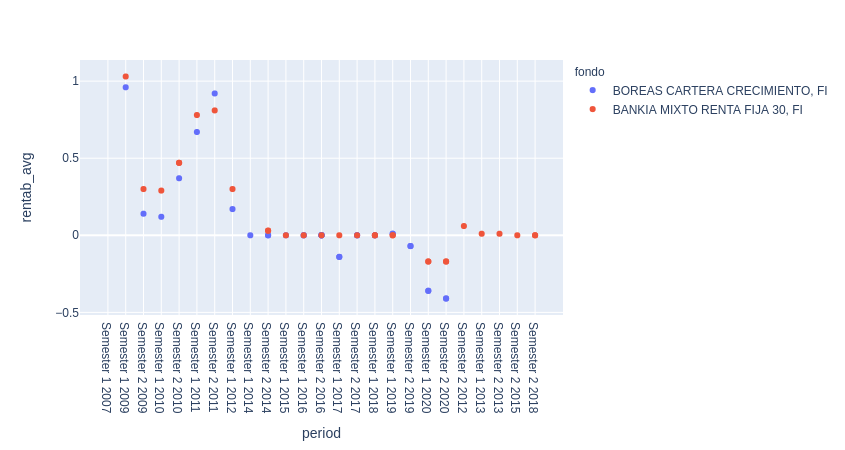

In [9]:
## Visualizaciones
df['period_type']=df.apply(lambda x: period_type(x['period']), axis=1)
df['start_date'] =pd.to_datetime(df['start_date'])
df['end_date'] =pd.to_datetime(df['end_date'])
fondo_filt=(df['fondo']=='BOREAS CARTERA CRECIMIENTO, FI')|(df['fondo']=='BANKIA MIXTO RENTA FIJA 30, FI')
timeframe=df['period_type']=='Semester'   #Semester or Trimester
var='rentab_avg'

viz_df=df[fondo_filt&timeframe].sort_values('end_date',ascending=True)

import plotly.express as px
fig = px.scatter(viz_df, x="period", y='rentab_avg', color='fondo')
fig

In [7]:
viz_df.tail()

,fondo,name,nif,period,start_date,end_date,registro_CNMV,email_gest,rating_depos,riesgo,...,comision_gest_res,comision_gest_total,comision_depos,rentab_IIC_trim,volat_vl_trim,ratio_gastos_trim,gestora,depos,ISIN,period_type
55,"BOREAS CARTERA CRECIMIENTO, FI",CLASE I BOREAS CARTERA ACTIVA FI,85114205,Semester 1 2019,2019-01-01,2019-06-30,3836,N/D,ND,5 en una escala de 1 a 7,...,0,0.6,0.04,[],[],[],NaN,NaN,NaN,Semester
58,"BOREAS CARTERA CRECIMIENTO, FI",CLASE R BOREAS CARTERA ACTIVA FI,85114205,Semester 2 2020,2020-07-01,2020-12-31,3836,N/D,ND,5 en una escala de 1 a 7,...,0,0.9,0.04,[],[],[],NaN,NaN,NaN,Semester
59,"BOREAS CARTERA CRECIMIENTO, FI",CLASE I BOREAS CARTERA ACTIVA FI,85114205,Semester 2 2020,2020-07-01,2020-12-31,3836,N/D,ND,5 en una escala de 1 a 7,...,0,0.6,0.04,[],[],[],NaN,NaN,NaN,Semester
62,"BOREAS CARTERA CRECIMIENTO, FI",CLASE R BOREAS CARTERA ACTIVA FI,85114205,Semester 1 2020,2020-01-01,2020-06-30,3836,N/D,ND,5 en una escala de 1 a 7,...,0,0.89,0.04,[],[],[],NaN,NaN,NaN,Semester
63,"BOREAS CARTERA CRECIMIENTO, FI",CLASE I BOREAS CARTERA ACTIVA FI,85114205,Semester 1 2020,2020-01-01,2020-06-30,3836,N/D,ND,5 en una escala de 1 a 7,...,0,0.6,0.04,[],[],[],NaN,NaN,NaN,Semester


In [11]:
print('a/b')

a/b


In [16]:
dict_links

{'1 KESSLER GLOBAL, FI': 'https://www.cnmv.es/portal/Consultas/IIC/Fondo.aspx?nif=V66247677 ',
 'A&G RENTA FIJA CORTO PLAZO, FI': 'https://www.cnmv.es/portal/Consultas/IIC/Fondo.aspx?nif=V85405082 ',
 'ABACO GLOBAL VALUE OPPORTUNITIES FI': 'https://www.cnmv.es/portal/Consultas/IIC/Fondo.aspx?nif=V87152088 ',
 'ABACO RENTA FIJA MIXTA GLOBAL, FI': 'https://www.cnmv.es/portal/Consultas/IIC/Fondo.aspx?nif=V86467461 ',
 'ABANCA GESTION, FI': 'https://www.cnmv.es/portal/Consultas/IIC/Fondo.aspx?nif=V86844974 ',
 'ABANCA RENTA FIJA FLEXIBLE, FI': 'https://www.cnmv.es/portal/Consultas/IIC/Fondo.aspx?nif=V84857739 ',
 'ABANCA RENTA FIJA MIXTA, FI': 'https://www.cnmv.es/portal/Consultas/IIC/Fondo.aspx?nif=V87109906 ',
 'ABANCA RENTA FIJA PATRIMONIO, FI': 'https://www.cnmv.es/portal/Consultas/IIC/Fondo.aspx?nif=V85377406 ',
 'ABANCA RENTA VARIABLE ESPAÑA, FI': 'https://www.cnmv.es/portal/Consultas/IIC/Fondo.aspx?nif=V87112173 ',
 'ABANCA RENTA VARIABLE EUROPA, FI': 'https://www.cnmv.es/portal/Con

In [27]:
fondo='ACCION EUROSTOXX 50 ETF, FI COTIZADO ARMONIZADO'
os.remove(f'data/csv/{fondo}.csv')
print(f'{fondo}.csv deleted')

ACCION EUROSTOXX 50 ETF, FI COTIZADO ARMONIZADO.csv deleted
